# This notebook provides an exploration and analysis of the dataset used in the Capstone project.

In [18]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

## books.csv

In [2]:
books = pd.read_csv('books.csv')

In [3]:
books.shape

(10000, 23)

In [4]:
books.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [45]:
list(books.columns)

['book_id',
 'goodreads_book_id',
 'best_book_id',
 'work_id',
 'books_count',
 'isbn',
 'isbn13',
 'authors',
 'original_publication_year',
 'original_title',
 'title',
 'language_code',
 'average_rating',
 'ratings_count',
 'work_ratings_count',
 'work_text_reviews_count',
 'ratings_1',
 'ratings_2',
 'ratings_3',
 'ratings_4',
 'ratings_5',
 'image_url',
 'small_image_url']

In [6]:
books.isnull().sum()

book_id                         0
goodreads_book_id               0
best_book_id                    0
work_id                         0
books_count                     0
isbn                          700
isbn13                        585
authors                         0
original_publication_year      21
original_title                585
title                           0
language_code                1084
average_rating                  0
ratings_count                   0
work_ratings_count              0
work_text_reviews_count         0
ratings_1                       0
ratings_2                       0
ratings_3                       0
ratings_4                       0
ratings_5                       0
image_url                       0
small_image_url                 0
dtype: int64

The missing values are not going to have any effect on the recommendation engine.

In [7]:
books.average_rating.mean()

4.002191000000001

An overall average rating above 4 on a scale from 1 to 5 clearly reflects the fact that the dataset contains the 10,000 most popular books!

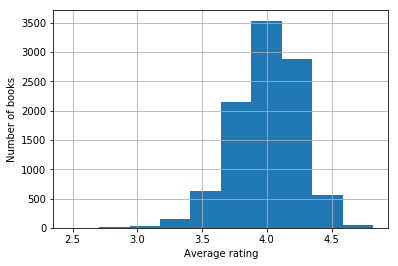

In [55]:
books.average_rating.hist();
plt.xlabel('Average rating');
plt.ylabel('Number of books');

Next let's look at the number of ratings for each book. 

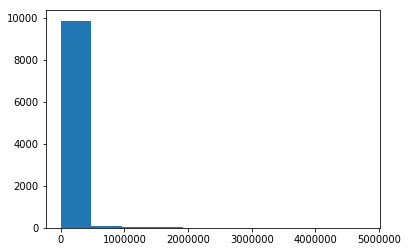

In [64]:
plt.hist(books.ratings_count);

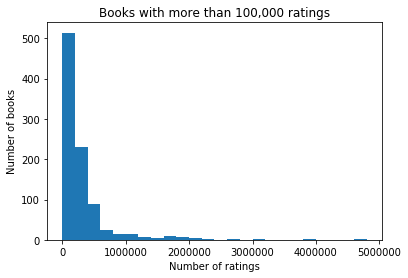

In [82]:
b = books[books.ratings_count > 100000]
bins = np.arange(0, b['ratings_count'].max() + 200000, 200000)
plt.hist(data = b, x = 'ratings_count', bins = bins);
plt.title("Books with more than 100,000 ratings");
plt.xlabel("Number of ratings");
plt.ylabel("Number of books");

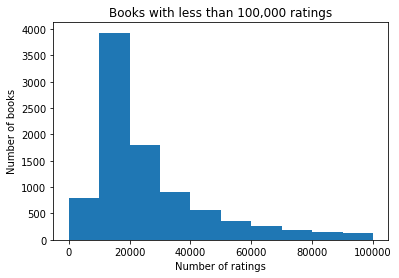

In [83]:
b = books[books.ratings_count < 100000]
bins = np.arange(0, b['ratings_count'].max() + 10000, 10000)
plt.hist(data = b, x = 'ratings_count', bins = bins);
plt.title("Books with less than 100,000 ratings");
plt.xlabel("Number of ratings");
plt.ylabel("Number of books");

## ratings.csv

In [86]:
ratings = pd.read_csv('ratings.csv')

In [87]:
ratings.shape

(5976479, 3)

In [88]:
ratings.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


How many unique books are rated?

In [90]:
len(ratings.book_id.unique())

10000

How many unique users are represented?

In [91]:
len(ratings.user_id.unique())

53424

In [105]:
ratings.groupby('user_id').rating.count().mean()

111.86880428271938

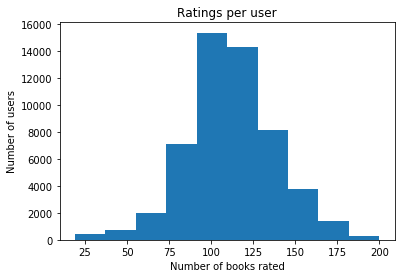

In [102]:
plt.hist(ratings.groupby('user_id').rating.count());
plt.title("Ratings per user");
plt.xlabel("Number of books rated");
plt.ylabel("Number of users");

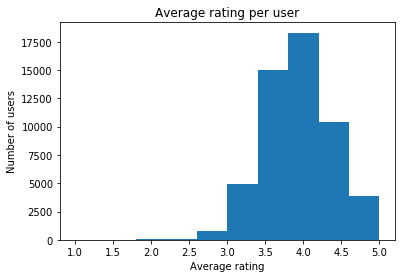

In [116]:
plt.hist(ratings.groupby('user_id').rating.mean());
plt.title("Average rating per user");
plt.xlabel("Average rating");
plt.ylabel("Number of users");

## tags.csv

In [117]:
tags = pd.read_csv('tags.csv')

In [118]:
tags.shape

(34252, 2)

In [119]:
tags.head()

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


30                        -gr-
31                    -history
32                  -imaginary
33                     -italy-
34                       -la--
35                        -los
36                     -mass--
37                    -murder-
38                      -n-y--
39                -non-poetry-
40                 -performing
41                       -post
42                -psychology-
43                       -read
44                     -single
45                   -specific
46                 -television
47                           0
48            0-0-0-0cant-find
49                   0-0-bingo
50             0-4-star-rating
51     0-a-find-2016-summer-00
52                      0-all2
53      0-best-picture-younger
54                     0-boxed
55                         0-c
56              0-eric-s-books
57                0-house-lbkc
58                    0-kindle
59                0-love-funny
60      0-made-me-cry-moved-me
61                0-nonfiction
62      

Apart from a small handful of predefined Goodreads tags ("shelves") all these tag_names are user-defined, and the quality and usefulness of the data reflects this fact.

In [121]:
book_tags = pd.read_csv('book_tags.csv')

In [122]:
book_tags.shape

(999912, 3)

In [123]:
book_tags.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


In [128]:
toread = pd.read_csv('to_read.csv')

In [129]:
toread.shape

(912705, 2)

In [130]:
toread.head()

,user_id,book_id
0,9,8
1,15,398
2,15,275
3,37,7173
4,34,380
